<a href="https://colab.research.google.com/github/KUNALKEDARI20/Data-science/blob/main/Ridge_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
#built in dataset from sklearn is used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#Loading pre-defined boston dataset
boston_dataset=datasets.load_boston()
boston_dataset#it returns a dictionary
#print(boston_dataset.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
#Load the data and divide into X and Y variables
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd['Housing Price']=pd.Series(boston_pd_target)

#Input
X=boston_pd.iloc[:,:-1]

#Output
Y=boston_pd.iloc[:,-1]


In [ ]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Housing Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#Split the data into train and test set

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.35,random_state=7)

In [ ]:
xtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44
278,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16


In [ ]:
#Apply linear regression
lreg=LinearRegression()
lreg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#generate predictions on test set
lreg_y_pred=lreg.predict(xtest)
lreg_y_pred #shows predicted prices of houses from test data

array([22.88129173, 19.12890635, 19.87903403, 19.12252418,  5.73509883,
       12.26062554, 21.5442757 , 28.83025566, 29.63113529, 14.24516544,
        6.39665318, 32.81329767, 18.94315961, 19.89893861, 37.60285395,
       22.87436102, 29.34067821, 33.397476  , 10.20531081, 24.63361462,
       21.25963068, 27.48214067, 37.92108798, 13.76804515,  9.04638242,
       15.06160824, 35.7824901 , 25.90401408, 25.59853245, 27.43209106,
       19.06642569, 31.04514381, 31.38288084, 16.5459799 , 40.001745  ,
       20.31111507, 18.93315868, 17.32062712, 21.61995798, 28.3298555 ,
       27.09693019, 19.05440312, 14.0379349 , 25.77719439, 18.56765923,
       14.03021726, 25.07148511, 19.15424918, 20.35897908,  7.15580976,
       27.88608693, 27.00303857, 13.23272728, 39.65026454, 14.97597259,
       21.9293232 , 20.35881414, 20.52260192, 23.87903964, 22.0760456 ,
       20.76295846, 35.40871073, 17.59912252, 21.08806419, 24.21290784,
       43.76913125, 19.72177774, 19.85687564, 22.56226131, 28.25

In [ ]:
#calculated Mean Squared Error
MSE=np.mean((lreg_y_pred-ytest)**2)
print('Mean-Squared-Error:',MSE)#high error

Mean-Squared-Error: 24.39854996940622


In [ ]:
lreg_coefficents=pd.DataFrame()
lreg_coefficents['Column Names']=xtrain.columns
lreg_coefficents['Coefficent Estimator']=pd.Series(lreg.coef_)
lreg_coefficents

,Column Names,Coefficent Estimator
0,CRIM,-0.113356
1,ZN,0.031694
2,INDUS,0.011791
3,CHAS,2.572988
4,NOX,-16.246488
5,RM,5.089816
6,AGE,-0.010299
7,DIS,-1.297994
8,RAD,0.281771
9,TAX,-0.011021


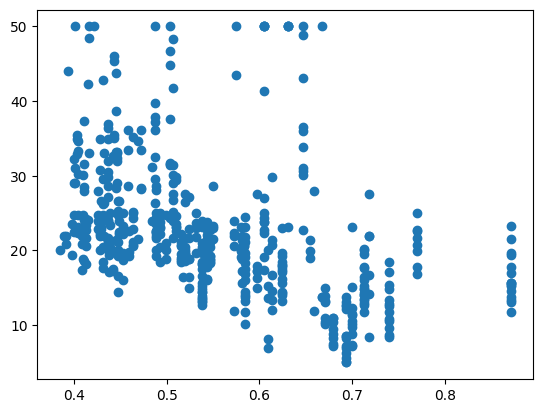

In [ ]:
plt.scatter(boston_pd['NOX'],boston_pd['Housing Price'])
# not so high negative correlation. upto 0.7 NOX prices are still high. So our model should not give much importance to NOX

<Axes: xlabel='Coefficent Estimator', ylabel='Column Names'>

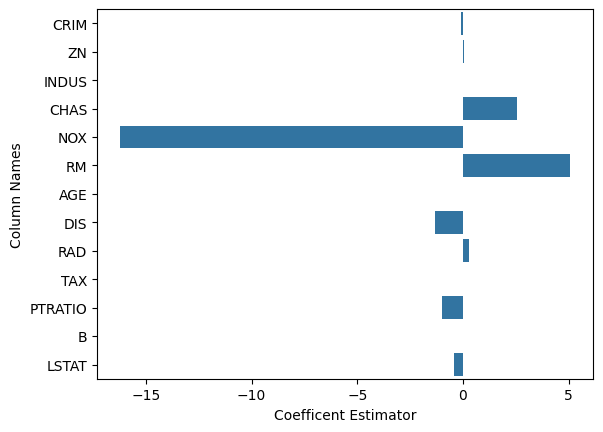

In [ ]:
import seaborn as sns

sns.barplot(x='Coefficent Estimator',y='Column Names',data=lreg_coefficents)


**1.RIDGE**

In [ ]:
#import ridge regression
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 2) # alpha is a hyper parameter which needs to be experimented
ridgeR.fit(xtrain, ytrain)
y_pred = ridgeR.predict(xtest)


In [ ]:
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - ytest)**2)
print(mean_squared_error_ridge)


25.0193578882503


In [ ]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= xtrain.columns
ridge_coefficient['Linear Coeff.Estimate'] = pd.Series(lreg.coef_)
ridge_coefficient['Ridge Coeff.Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    Columns  Linear Coeff.Estimate  Ridge Coeff.Estimate
0      CRIM              -0.113356             -0.112885
1        ZN               0.031694              0.034430
2     INDUS               0.011791             -0.031941
3      CHAS               2.572988              2.417354
4       NOX             -16.246488             -5.396887
5        RM               5.089816              5.179487
6       AGE              -0.010299             -0.017514
7       DIS              -1.297994             -1.126155
8       RAD               0.281771              0.260420
9       TAX              -0.011021             -0.012127
10  PTRATIO              -0.987688             -0.853142
11        B               0.010006              0.010327
12    LSTAT              -0.406973             -0.419692


**2.LASSO**

In [ ]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.05)
lasso.fit(xtrain, ytrain)
y_pred1 = lasso.predict(xtest)

In [ ]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - ytest)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 25.646794071810387


In [ ]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = xtrain.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

    Columns  Coefficient Estimate
0      CRIM             -0.109569
1        ZN              0.035333
2     INDUS             -0.045786
3      CHAS              1.933910
4       NOX             -0.000000
5        RM              5.246648
6       AGE             -0.019925
7       DIS             -1.011930
8       RAD              0.248191
9       TAX             -0.012872
10  PTRATIO             -0.782484
11        B              0.010550
12    LSTAT             -0.426948


**3.ELASTIC NET**

In [ ]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .01,l1_ratio=.3) #l1_ratio should be in between 0 and 1. then it will be a combination of L1 and L2.
e_net.fit(xtrain, ytrain)

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [ ]:
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(xtest)
mean_squared_error = np.mean((y_pred_elastic - ytest)**2)
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 25.054481573258272


In [ ]:
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = xtrain.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.112643
1,ZN,0.034729
2,INDUS,-0.034575
3,CHAS,2.352451
4,NOX,-4.616251
5,RM,5.166632
6,AGE,-0.017738
7,DIS,-1.111953
8,RAD,0.259562
9,TAX,-0.012254
